# Neuronal Regime Modeling 

### By: Rany Tith, Dylan Riffle, and Jose Manuel Aguilar 
### Date: 05/27/2024


## Introduction
Brain neurons are susceptible to instability. In the real world this can manifest itself in epilepsy. It is hypothesized that inhibiory stabilization offers
a dynamic, fast, and flexible to balance unbalanced networks. The intuition is that this allows the brain to operate in its most efficient regimes.

## Equations

Consider the following definition of inhibition-stabilized networks.

$$ \tau \dfrac{dr}{dt} = -r + [W \cdot r + s ]_{+} $$

Where we let:
* $r = \begin{pmatrix} r_{E} & r_{I} \end{pmatrix}$, $r_{E}$ is the excitatory rate, $r_{I}$ is the inhibition rate.
* $[ \cdot ]_{+}$ represents half wave rectification.
* $\tau$ is a time constant of network integration
* $s = \begin{pmatrix} S_{E} & S_{I} \end{pmatrix}$, this represents the feedforward input for the two populations $S_{E}$ and $S_{I}$.
* $W = \begin{pmatrix}
          W_{E \leftarrow E} & W_{E \leftarrow I} \\
          W_{I \leftarrow E} & W_{I \leftarrow I}
       \end{pmatrix}$ where each $W$ represents a coupling between the populations.

### Steady State

Suppose we let $ \dfrac{dr_{E}}{dt} = 0$ and $\dfrac{dr_{I}}{dt} = 0$ 

We then get:

$$
    \delta r_{I} = \dfrac{1 - W_{E \leftarrow E}}{\Delta} \delta S_{I}
$$

where

$$
    \Delta = \text{Det}\left ( I - W \right)
$$



From this, we can see that there is some intuitino on what happens if $W_{E \leftarrow E}$ is greater than 1 or less than 1.

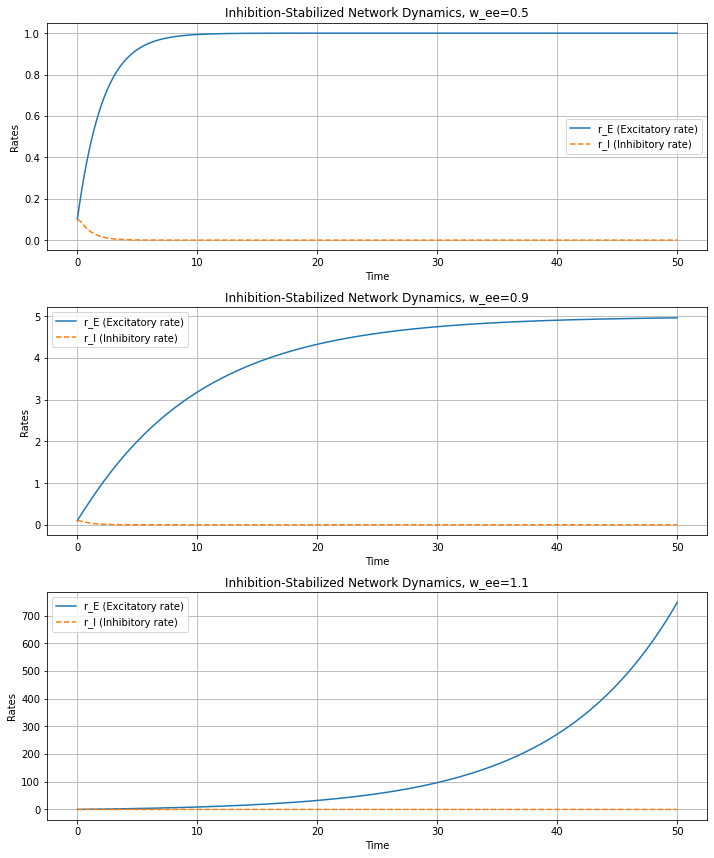

In [43]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def half_wave_rectify(x):
    """
    Half wave rectifying function
    """
    return np.maximum(x, 0)


def inhibition_stabilized_network(r, t, w_ee):
    """
    Inhibition Stabilized Network
    """
    
    r_E, r_I = r
    r_vector = np.array([r_E, r_I])
    
    tau = 1.0
    
    W = np.array([[w_ee, -0.3], [-0.4, 0.2]])
    s = np.array([0.5, 0.1])
    dr_dt = (-r_vector + half_wave_rectify(np.dot(W, r_vector) + s)) / tau
    return dr_dt


r0 = [0.1, 0.1]

t = np.linspace(0, 50, 1000)

solution0 = odeint(inhibition_stabilized_network, r0, t, args=(0.5,))
solution1 = odeint(inhibition_stabilized_network, r0, t, args=(0.9,))
solution2 = odeint(inhibition_stabilized_network, r0, t, args=(1.1,))


r_E_solution0 = solution0[:, 0]
r_I_solution0 = solution0[:, 1]

r_E_solution1 = solution1[:, 0]
r_I_solution1 = solution1[:, 1]

r_E_solution2 = solution2[:, 0]
r_I_solution2 = solution2[:, 1]

plt.figure(figsize=(10, 12))


plt.subplot(3, 1, 1)

plt.plot(t, r_E_solution0, label='r_E (Excitatory rate)')
plt.plot(t, r_I_solution0, label='r_I (Inhibitory rate)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Rates')
plt.title('Inhibition-Stabilized Network Dynamics, w_ee=0.5')
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 2)

plt.plot(t, r_E_solution1, label='r_E (Excitatory rate)')
plt.plot(t, r_I_solution1, label='r_I (Inhibitory rate)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Rates')
plt.title('Inhibition-Stabilized Network Dynamics, w_ee=0.9')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)

plt.plot(t, r_E_solution2, label='r_E (Excitatory rate)')
plt.plot(t, r_I_solution2, label='r_I (Inhibitory rate)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Rates')
plt.title('Inhibition-Stabilized Network Dynamics, w_ee=1.1')
plt.legend()
plt.grid(True)

plt.tight_layout(pad=1.0)

plt.show()


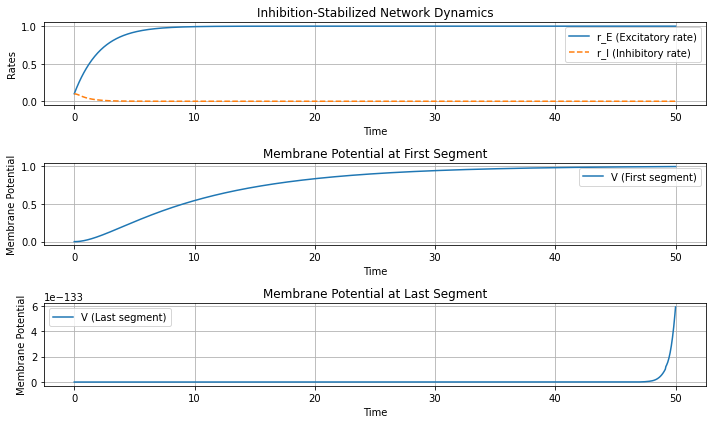

(1000, 100)
t.shape:  (1000,)


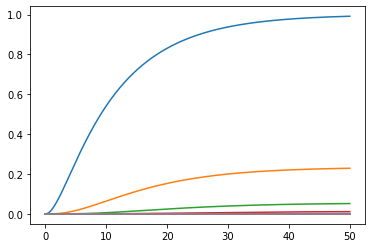

1000

In [149]:

n_segments = 100  # Number of segments to discretize the cable
dx = 5.0  # Length of each segment
Rm = 10.0  # Membrane resistance
Cm = 1.0  # Membrane capacitance
Ra = 1.0  # Axial resistance
tau = 1.0  # Time constant for the network model

W = np.array([[0.5, -0.3], [-0.4, 0.2]])
s = np.array([0.5, 0.1])

# Cable equation function
def cable_equation(v, t, n, dx, Rm, Cm, Ra, r_E, r_I):
    """
    Cable Equation
    """
    
    
    dVdt = np.zeros(n)
    
    dVdt[0] = (-v[0] + (r_E - r_I)) / (Rm * Cm)
    for i in range(1, n-1):
        dVdt[i] = (v[i-1] - 2*v[i] + v[i+1]) / (dx**2 * Ra * Cm) - v[i] / (Rm * Cm)
   #  dVdt[-1] = (-v[-1] + (r_E - r_I)) / (Rm * Cm)
    return dVdt


def combined_system(y, t, n_segments, dx, Rm, Cm, Ra, tau, W, s):
    """
    Combined System
    """

    r_E, r_I = y[:2]
    v = y[2:]
    r_vector = np.array([r_E, r_I])
    dr_dt = (-r_vector + half_wave_rectify(np.dot(W, r_vector) + s)) / tau
    dv_dt = cable_equation(v, t, n_segments, dx, Rm, Cm, Ra, r_E, r_I)
    return np.concatenate((dr_dt, dv_dt))

r0 = [0.1, 0.1]
v0 = np.zeros(n_segments)
y0 = np.concatenate((r0, v0))

t = np.linspace(0, 50, 1000)

solution = odeint(combined_system, y0, t, args=(n_segments, dx, Rm, Cm, Ra, tau, W, s))

r_E_solution = solution[:, 0]
r_I_solution = solution[:, 1]
v_solution = solution[:, 2:]

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, r_E_solution, label='r_E (Excitatory rate)')
plt.plot(t, r_I_solution, label='r_I (Inhibitory rate)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Rates')
plt.title('Inhibition-Stabilized Network Dynamics')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, v_solution[:, 0], label='V (First segment)')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Membrane Potential at First Segment')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, v_solution[:, -2], label='V (Last segment)')
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Membrane Potential at Last Segment')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


print(v_solution.shape)

print("t.shape: ", t.shape)


plt.plot(t, v_solution[:, :-2])
plt.show()

len(v_solution)

# Neuronal Model with Neuronal Types and Higher Fidelity